# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**



In **Part 4**, we will be building a regression model of Leishmania inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project_Msc/Project/pIC50_data/Leishmania_06_bioactivity_data_3class_AtomPairs2DCount_fp.csv")

## **2. Load the data set**

In [ ]:
df

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,pIC50,pIC50.1,class
0,24.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,4.000000,inactive
1,13.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.395774,5.395774,intermediate
2,10.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,4.000000,inactive
3,12.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.500313,5.500313,intermediate
4,12.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,4.000000,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,28.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.232102,7.232102,active
6487,14.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.423659,7.423659,active
6488,17.0,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.356547,7.356547,active
6489,16.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.113509,8.113509,active


In [ ]:
# df[df['class'] != 'intermediate']
df.drop( df.query(" `class`=='intermediate' ").index)

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,class
0,24.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
2,10.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
4,12.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
5,24.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
6,15.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,28.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,active
6487,14.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,active
6488,17.0,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,active
6489,16.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,active


In [ ]:
df

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,class
0,24.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
2,10.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
4,12.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
5,24.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
6,15.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,28.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,active
6487,14.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,active
6488,17.0,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,active
6489,16.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,active


In [ ]:
df=df.drop("pIC50.1",axis=1)

In [ ]:
# ! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/Project_Msc/Project/pIC50_data/Fingerprints_descriptors/model_dataset_"+fingerprint_output_file+".csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_Msc/Project/pIC50_data/Fingerprints_descriptors/model_dataset_Substructure.csv")

## **3. Input features**
The ***Leishmania*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [ ]:
X = df.drop('class', axis=1)
X

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,24.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,15.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,28.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6487,14.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6488,17.0,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6489,16.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **3.2. Output features**

In [ ]:
Y = df["class"]
Y

0       inactive
2       inactive
4       inactive
5       inactive
6       inactive
          ...   
6486      active
6487      active
6488      active
6489      active
6490      active
Name: class, Length: 4833, dtype: object

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(4833, 780)

In [ ]:
Y.shape

(4833,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.9* (1 - .9)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(6491, 26)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

In [ ]:
X_train.shape, Y_train.shape

((4868, 26), (4868,))

In [ ]:
X_test.shape, Y_test.shape

((1623, 26), (1623,))

## **5. Building a classification Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.15950709529317664

In [ ]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

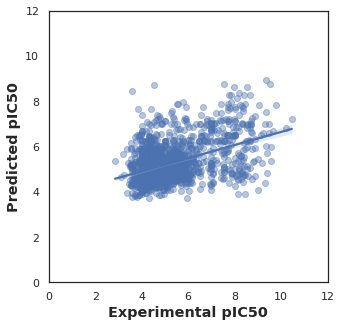

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
# from sklearn.model_selection import cross_validate
# def cross_validation(model, X, y, cv=10):
#       '''Function to perform 5 Folds Cross-Validation
#        Parameters
#        ----------
#       model: Python Class, default=None
#               This is the machine learning algorithm to be used for training.
#       _X: array
#            This is the matrix of features.
#       _y: array
#            This is the target variable.
#       _cv: int, default=5
#           Determines the number of folds for cross-validation.
#        Returns
#        -------
#        The function returns a dictionary containing the metrics 'accuracy', 'precision',
#        'recall', 'f1' for both training set and validation set.
#       '''
#       _scoring = ['accuracy', 'precision', 'recall', 'f1']
#       results = cross_validate(estimator=model,
#                                X=_X,
#                                y=_y,
#                                cv=_cv,
#                                scoring=_scoring,
#                                return_train_score=True)
      
#       return {"Training Accuracy scores": results['train_accuracy'],
#               "Mean Training Accuracy": results['train_accuracy'].mean()*100,
#               "Training Precision scores": results['train_precision'],
#               "Mean Training Precision": results['train_precision'].mean(),
#               "Training Recall scores": results['train_recall'],
#               "Mean Training Recall": results['train_recall'].mean(),
#               "Training F1 scores": results['train_f1'],
#               "Mean Training F1 Score": results['train_f1'].mean(),
#               "Validation Accuracy scores": results['test_accuracy'],
#               "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
#               "Validation Precision scores": results['test_precision'],
#               "Mean Validation Precision": results['test_precision'].mean(),
#               "Validation Recall scores": results['test_recall'],
#               "Mean Validation Recall": results['test_recall'].mean(),
#               "Validation F1 scores": results['test_f1'],
#               "Mean Validation F1 Score": results['test_f1'].mean()
#               }

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
df_y=pd.read_csv("/content/drive/MyDrive/Project_Msc/Project/pIC50_data/Leishmania_03_bioactivity_data_curated.csv")

In [ ]:
_Y=df_y['class']

In [ ]:
_Y

0           inactive
1       intermediate
2           inactive
3       intermediate
4           inactive
            ...     
6486          active
6487          active
6488          active
6489          active
6490          active
Name: class, Length: 6491, dtype: object

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Project_Msc/Project/pIC50_data/Leishmania_04_bioactivity_data_3class_pIC50.csv")

In [ ]:
df2.drop("Unnamed: 0",axis=1)

In [ ]:
df_2 = df2[df2['class'] != 'intermediate']

In [ ]:
_Y=df_2["class"]

(6491, 26)

In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1']  #cannot use this for Continous variable need to use activity variable ok
results = cross_validate(estimator=model, X=X,y=_Y, cv=10, scoring=scoring, return_train_score=True)

In [ ]:
model_result={"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()}

In [ ]:
print(model_result)

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_Msc/Project/pIC50_data/Fingerprints_descriptors/model_dataset_Substructure.csv")

In [ ]:
df.drop("pIC50.1",axis=1)

In [ ]:
X = df.drop('pIC50', axis=1)
X

In [ ]:
Y = df.pIC50
Y

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8* (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(6491, 722)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=0)

In [ ]:
X_train.shape, Y_train.shape

((4543, 722), (4543,))

In [ ]:
knn = KMeans(n_clusters = 11, algorithm = 'auto')

In [ ]:
knn.fit(X_train,Y_train)

KMeans(n_clusters=11)